In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

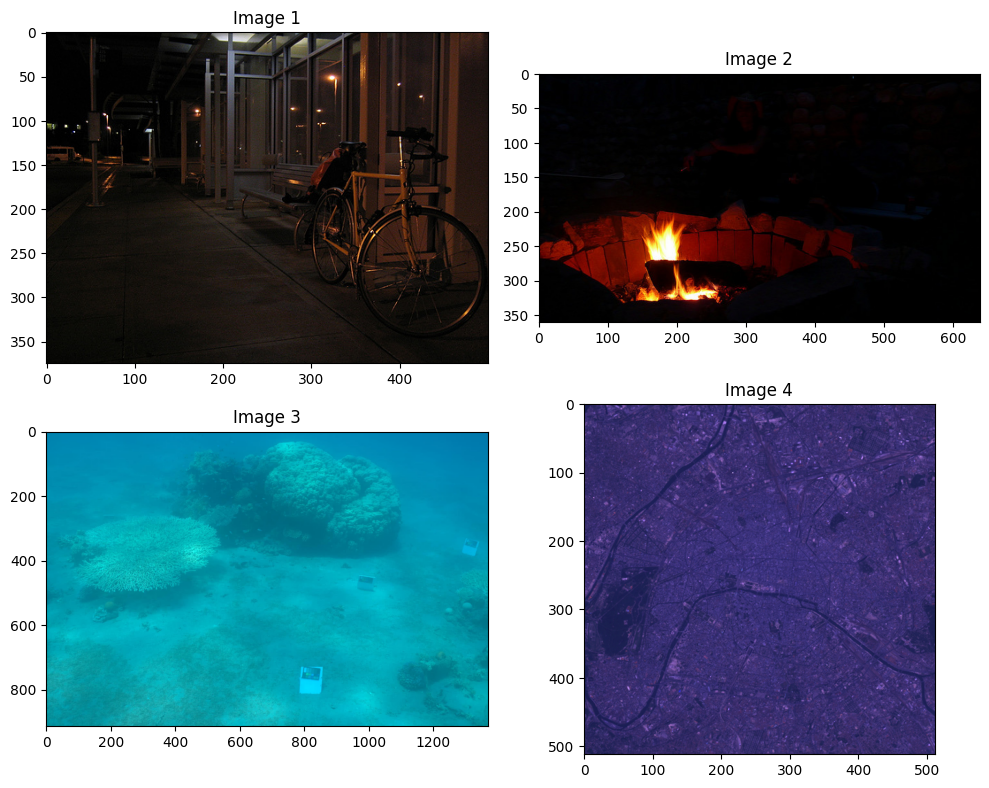

In [43]:
import cv2
import matplotlib.pyplot as plt

# Images
imagenes = ["image1.png", "image2.jpg", "image3.jpg", "image4.tif"]

# Number of rows and columns in the subplot grid
num_rows = 2
num_cols = 2

# Create a subplot with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Read and display each image in the subplot
for i, img_path in enumerate(imagenes):
    # Read the image
    image = cv2.imread(img_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error: Unable to load the image from {img_path}")
    else:
        # Determine the position in the subplot grid
        row = i // num_cols
        col = i % num_cols

        # Display the image in the specified subplot position
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].set_title(f'Image {i + 1}')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the subplot
plt.show()


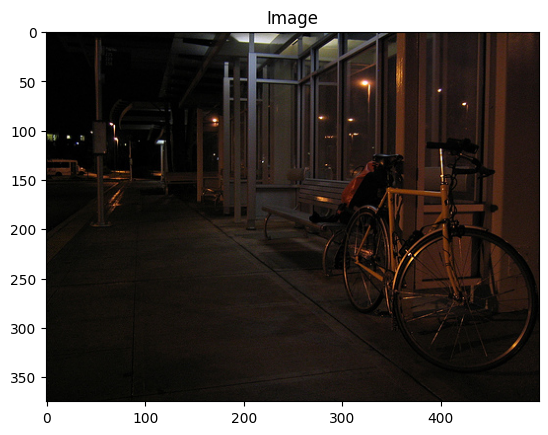

In [44]:
# Read an image from file
image = cv2.imread("image1.png")

# Check if the image was successfully loaded
if image is None:
    print(f"Error: Unable to load the image from")
else:
    # Display the image using OpenCV
    # cv2.imshow('Image', image)
    # cv2.waitKey(0)  # Wait until a key is pressed 
    # cv2.destroyAllWindows()

    # Alternatively, display the image using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.show()

#### Transformacion Lineal

## Ajuste de Parámetros en Transformación Lineal

En una transformación lineal, los parámetros principales que puedes modificar son \( \alpha \) y \( \beta \), que controlan el contraste y el brillo de la imagen, respectivamente. La fórmula general para la transformación lineal es:

\[ \text{{pixel\_transformado}} = \alpha \cdot \text{{pixel\_original}} + \beta \]

### Ajuste de \( \alpha \) y \( \beta \):

1. **Ajuste de \( \alpha \) (Contraste):**
   - \( \alpha \) controla el contraste de la imagen.
   - Si \( \alpha = 1 \), la imagen permanece sin cambios.
   - \( \alpha > 1 \) aumenta el contraste.
   - \( 0 < \alpha < 1 \) disminuye el contraste.

2. **Ajuste de \( \beta \) (Brillo):**
   - \( \beta \) controla el brillo de la imagen.
   - Si \( \beta = 0 \), el brillo permanece sin cambios.
   - \( \beta > 0 \) aumenta el brillo.
   - \( \beta < 0 \) disminuye el brillo.

### Utilidad de la Transformación Lineal:

La transformación lineal es útil para ajustar la apariencia visual de una imagen. Puedes resaltar características específicas al aumentar el contraste o mejorar la visibilidad ajustando el brillo. Es comúnmente utilizado en procesamiento de imágenes para mejorar la calidad visual y realzar detalles.

En el código proporcionado anteriormente, los valores de \( \alpha \) y \( \beta \) se pueden ajustar según tus necesidades. La transformación lineal se aplica a cada píxel de la imagen, proporcionando un control flexible sobre el contraste y el brillo.


In [92]:
def apply_linear_transformation(image_path, alpha, beta):
    # Leer la imagen desde un archivo
    image = cv2.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde {image_path}")
        return

    # Cambiar la intensidad del color (aumentar el brillo)
    brightened_image = cv2.addWeighted(image, 1, np.zeros_like(image), 0, beta)

    # Ajustar el contraste (usando alpha y beta)
    contrast = cv2.addWeighted(image, alpha, np.zeros_like(image), 0, 0)

    # Ajustar el brillo y contraste (usando alpha y beta)
    adjusted_image = cv2.addWeighted(image, alpha, np.zeros_like(image), 0, beta)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
    plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)), plt.title('Contraste Modificado')
    plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB)), plt.title('Brillo Modificado')
    plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)), plt.title('Brillo y Contraste Ajustados')
    plt.show()

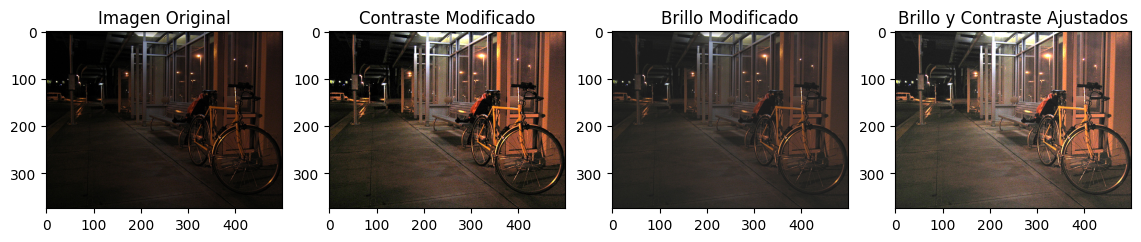

In [93]:
#                          (imagen,contraste,brillo)
apply_linear_transformation(imagenes[0],2.5,25)

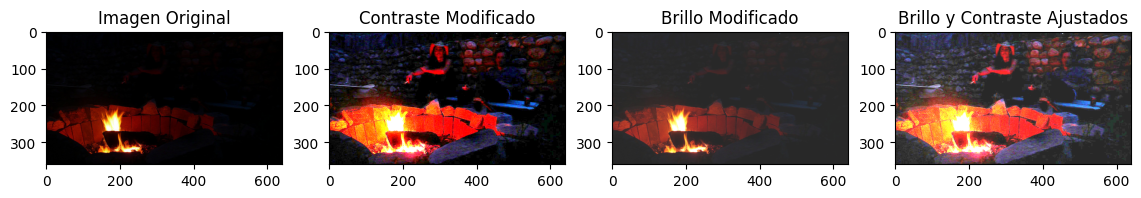

In [97]:
#                          (imagen,contraste,brillo)
apply_linear_transformation(imagenes[1],10,40)

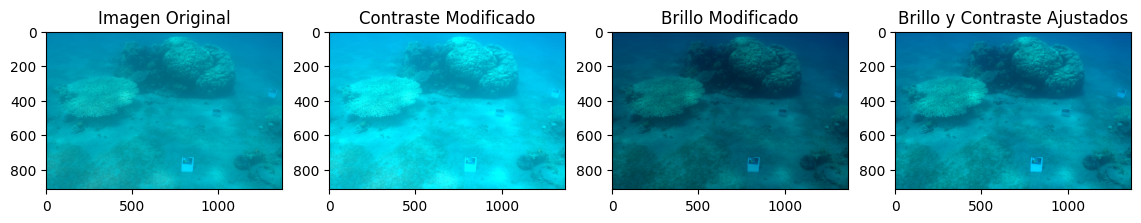

In [95]:
#                          (imagen,contraste,brillo)
apply_linear_transformation(imagenes[2],1.3,-70)

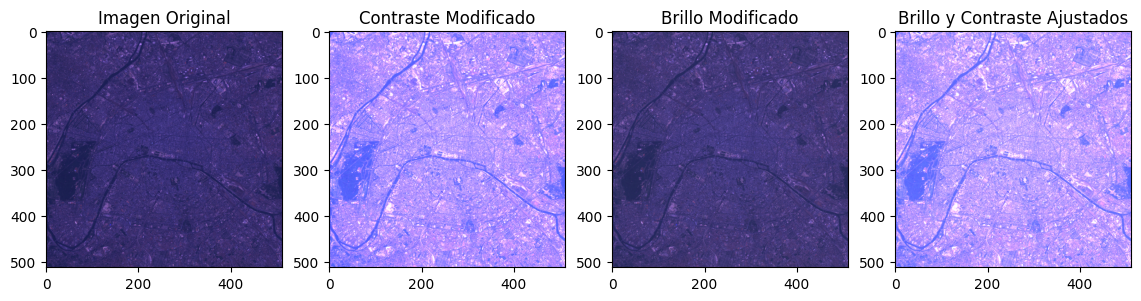

In [103]:
apply_linear_transformation(imagenes[3],3.1,10)

#### Transformacion Logaritmica

## Ajuste de Parámetros en Transformación Logarítmica

En una transformación logarítmica, el parámetro principal que puedes modificar es la constante de ajuste, que generalmente se suma al valor del píxel antes de aplicar el logaritmo. La fórmula general para la transformación logarítmica es:

\[ \text{{pixel\_transformado}} = c \cdot \log(1 + \text{{pixel\_original}}) \]

- \(c\) es la constante de ajuste.
- \(\log\) es la función logaritmo natural.

### Ajuste de \(c\):

1. **Pequeño valor de \(c\):**
   - La transformación logarítmica tiene menos efecto en píxeles de baja intensidad.
   - Adecuado para imágenes con contenido más uniforme en la región de baja intensidad.

2. **Valor grande de \(c\):**
   - La transformación logarítmica tiene un mayor efecto en píxeles de baja intensidad.
   - Puede ser útil para resaltar detalles en áreas más oscuras de la imagen.

En el código proporcionado anteriormente, la función `np.log1p` se utiliza en lugar de `np.log` para evitar problemas con el logaritmo de cero. La función `np.log1p` calcula el logaritmo natural de \(1 + x\), donde \(x\) es el valor de cada píxel.

### Utilidad de la Transformación Logarítmica:

La transformación logarítmica es útil en imágenes con un rango dinámico amplio, especialmente cuando hay detalles importantes en las regiones de baja intensidad. Puede mejorar la visualización de detalles en áreas oscuras y resaltar características que no son fácilmente perceptibles en la imagen original.

En resumen, el ajuste de la constante \(c\) en la transformación logarítmica permite personalizar la intensidad de realce aplicada a las regiones de baja intensidad, lo que puede ser beneficioso para mejorar la visibilidad de detalles en ciertos tipos de imágenes.


In [50]:
def apply_logarithmic_transformation(image):
    # Leer la imagen desde un archivo
    image = cv2.imread(image)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde")
        return

    # Aplicar la transformación logarítmica
    log_transformed_image = np.log1p(image.astype(float))

    # Normalizar la imagen transformada antes de mostrarla
    log_transformed_image_normalized = (255 * (log_transformed_image - np.min(log_transformed_image)) / (np.max(log_transformed_image) - np.min(log_transformed_image))).astype(np.uint8)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(log_transformed_image_normalized, cv2.COLOR_BGR2RGB)), plt.title('Transformación Logarítmica')
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_logarithmic_transformation(image_path):
    # Leer la imagen desde un archivo
    image = cv2.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen desde {image_path}")
        return

    # Convertir la imagen a escala de grises si es a color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar la transformación logarítmica
    log_transformed_image = np.log1p(image.astype(float))

    # Normalizar la imagen transformada antes de mostrarla
    log_transformed_image_normalized = (255 * (log_transformed_image - np.min(log_transformed_image)) / (np.max(log_transformed_image) - np.min(log_transformed_image))).astype(np.uint8)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Imagen Original')
    plt.subplot(1, 2, 2), plt.imshow(log_transformed_image_normalized, cmap='gray'), plt.title('Transformación Logarítmica')
    plt.show()

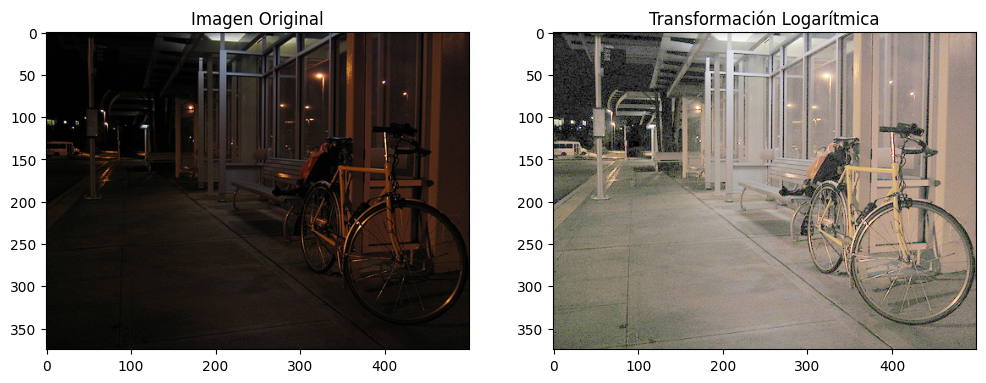

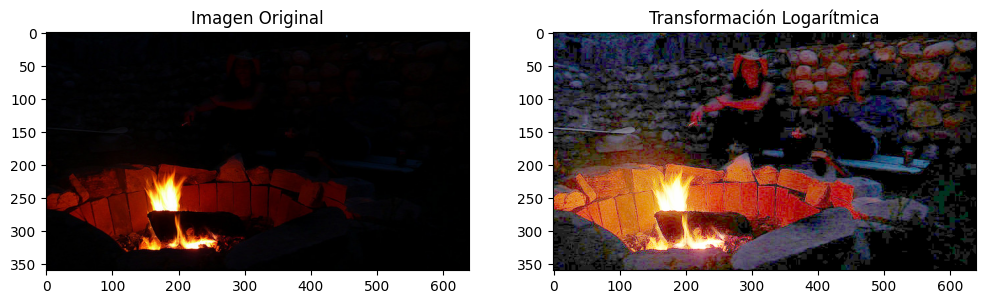

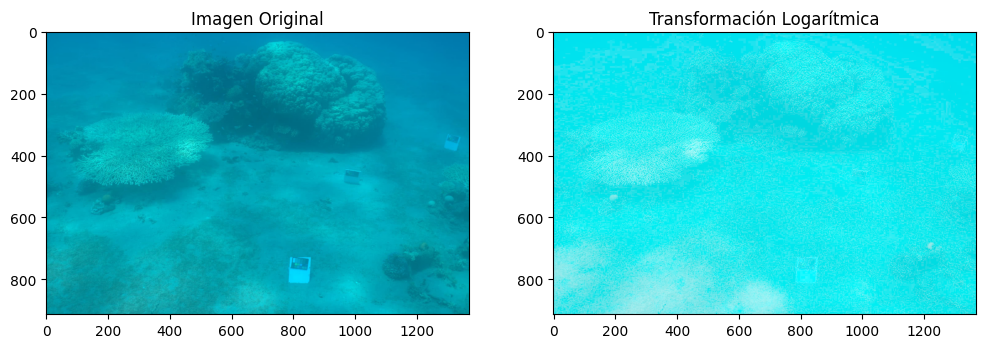

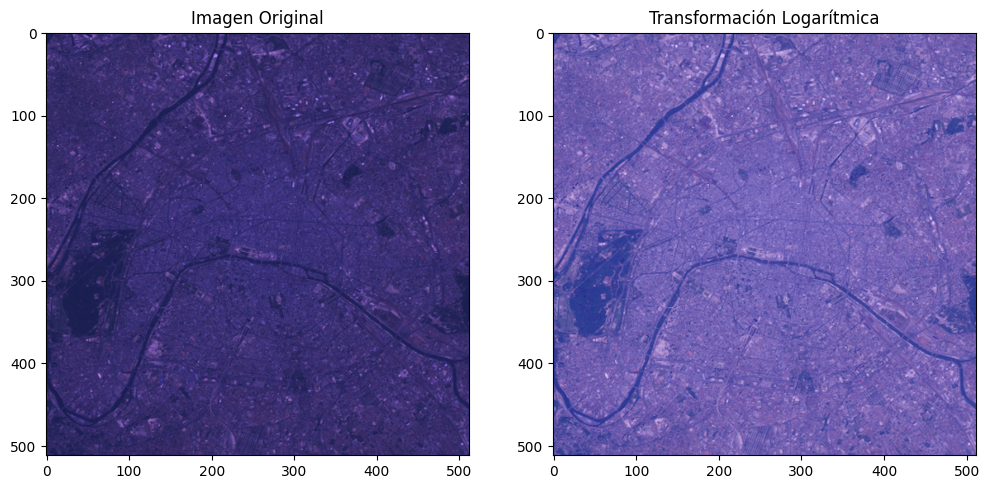

In [98]:
for i in imagenes:
    apply_logarithmic_transformation(i)